In [1]:
!pip install -r requirements.txt --quiet

In [2]:
import os
import shutil

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas import DataFrame
from scipy.stats import mannwhitneyu, normaltest
from statannotations.Annotator import Annotator
from watermark import watermark

In [3]:
# @title
def visSets(set1: list, set2: list, csvpath: str) -> [DataFrame, DataFrame]:
    """
    Visualize sets of data from csv files in a given directory

    Parameters:
    set1 (list): List of strings indicating well names for set 1
    set2 (list): List of strings indicating well names for set 2
    csvpath (str): Path to directory containing csv files

    Returns:
    Tuple: A tuple of two pandas dataframes, containing data from well_set1 and well_set2 respectively

    """
    dir_list = os.listdir(csvpath)
    print("Files and directories in '", path, "' :")

    well_set1 = pd.DataFrame()
    well_set2 = pd.DataFrame()

    # read csv of set 1
    for well in set1:
        for csv in dir_list:
            if csv.find(well, 0, 3) > -1:
                csv_set = pd.read_csv(csvpath + csv, sep=",")
                csv_set["Well"] = well
                well_set1 = pd.concat([well_set1, csv_set])

    # read csv of set 2
    for well in set2:
        for csv in dir_list:
            if csv.find(well, 0, 3) > -1:
                csv_set = pd.read_csv(csvpath + csv, sep=",")
                csv_set["Well"] = well
                well_set2 = pd.concat([well_set2, csv_set])

    return well_set1, well_set2

In [4]:
# @title
def pltoSet1(B23: DataFrame):
    """
    This function creates a box plot using the Seaborn library. It takes a pandas DataFrame as input
    and visualizes the distribution of "Mean" values for different "Well" categories.
    The plot is created with a logarithmic x axis, horizontal boxes and grid lines for the x axis.
    The y axis is labeled with "Mean".

    Parameters:
    B23 (pd.DataFrame): A pandas DataFrame with columns "Well" and "Mean".

    Returns:
    None
    """
    sns.set_theme(style="ticks")

    # Initialize the figure with a logarithmic x axis
    f, ax = plt.subplots(figsize=(7, 6))

    # Plot the orbital period with horizontal boxes
    sns.boxplot(
        x="Well",
        y="Mean",
        data=B23,
        width=0.6,
        palette="vlag",
        showfliers=False,
    )

    # Add in points to show each observation
    # sns.swarmplot(x="Well", y="Mean", data=B23,
    #              size=3, palette="vlag")

    # Tweak the visual presentation
    ax.xaxis.grid(True)
    ax.set(ylabel="Mean")
    sns.despine(trim=True, left=True)

In [5]:
# @title
def norm_test(data: list, name: str):
    """
    Performs a normality test on a given data sample and returns a conclusion on whether the data is from a normal distribution.

    Inputs:
    data (list): A list of numerical values representing the data sample
    name (str): A string that represents the name of the data sample

    Outputs:
    None

    Side effects:
    Prints the p-value and the conclusion of the normality test on the data sample.

    Example:
    >>> norm_test([1, 2, 3, 4, 5], "Sample Data")
    p = 0.157298
    null hypothesis: Sample Data comes from a normal distribution
    The null hypothesis cannot be rejected
    """
    k2, p = normaltest(data)
    alpha = 1e-3
    print("p = {:g}".format(p))
    print("null hypothesis: {} comes from a normal distribution".format(name))
    if p < alpha:  # null hypothesis: Data2 (Aptamil) from a normal distribution
        print("The null hypothesis can be rejected")
    else:
        print("The null hypothesis cannot be rejected")
    print("")

In [6]:
# @title
def visStats(set1: list, set2: list, path: str, stat_text: str, fig_name: str):
    """
    visStats(set1: list, set2: list, path: str, stat_text: str, fig_name: str):

    This function generates visualization of statistics between two sets of data and saves the figure to current path.

    set1: list
    A list of strings containing the name of each well in the first set.
    set2: list
    A list of strings containing the name of each well in the second set.
    path: str
    The path to the directory where the figure will be saved.
    stat_text: str
    The text to be added to the plot as a title or subtitle.
    fig_name: str
    The name of the figure file to be saved.

    Returns: None
    """

    well_set1, well_set2 = visSets(set1, set2, path)
    well_set1["Set"] = 1
    well_set1["Well"].describe()

    well_set2["Set"] = 2
    well_set2["Well"].describe()

    pltoSet1(well_set1)
    pltoSet1(well_set2)

    print("Statistics:")
    print("")

    csv_all = pd.concat([well_set1, well_set2])

    sns.set_theme(style="ticks")

    # Initialize the figure with a logarithmic x axis
    f, ax = plt.subplots(figsize=(7, 6))

    # Plot the orbital period with horizontal boxes
    sns.boxplot(
        x="Well",
        y="Mean",
        data=csv_all,
        width=0.6,
        hue="Set",
        palette=["m", "g"],
    )

    # Add in points to show each observation
    # sns.swarmplot(x="Well", y="Mean", data=B23,
    #              size=3, palette="vlag")

    # Tweak the visual presentation
    # ax.xaxis.grid(True)
    ax.set(ylabel="Mean")
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    # sns.despine(trim=True, left=True)

    for well in set1:
        norm_test(csv_all[csv_all["Well"] == well].Mean, well)

    for well in set2:
        norm_test(csv_all[csv_all["Well"] == well].Mean, well)

    # pvalues with scipy:
    stat_results = [
        mannwhitneyu(
            csv_all[csv_all["Well"] == set1[0]].Mean,
            csv_all[csv_all["Well"] == set2[0]].Mean,
            alternative="two-sided",
        ),
        mannwhitneyu(
            csv_all[csv_all["Well"] == set1[0]].Mean,
            csv_all[csv_all["Well"] == set2[1]].Mean,
            alternative="two-sided",
        ),
        mannwhitneyu(
            csv_all[csv_all["Well"] == set1[0]].Mean,
            csv_all[csv_all["Well"] == set2[2]].Mean,
            alternative="two-sided",
        ),
        mannwhitneyu(
            csv_all[csv_all["Well"] == set1[1]].Mean,
            csv_all[csv_all["Well"] == set2[0]].Mean,
            alternative="two-sided",
        ),
        mannwhitneyu(
            csv_all[csv_all["Well"] == set1[1]].Mean,
            csv_all[csv_all["Well"] == set2[1]].Mean,
            alternative="two-sided",
        ),
        mannwhitneyu(
            csv_all[csv_all["Well"] == set1[1]].Mean,
            csv_all[csv_all["Well"] == set2[2]].Mean,
            alternative="two-sided",
        ),
        mannwhitneyu(
            csv_all[csv_all["Well"] == set1[2]].Mean,
            csv_all[csv_all["Well"] == set2[0]].Mean,
            alternative="two-sided",
        ),
        mannwhitneyu(
            csv_all[csv_all["Well"] == set1[2]].Mean,
            csv_all[csv_all["Well"] == set2[1]].Mean,
            alternative="two-sided",
        ),
        mannwhitneyu(
            csv_all[csv_all["Well"] == set1[2]].Mean,
            csv_all[csv_all["Well"] == set2[2]].Mean,
            alternative="two-sided",
        ),
        # mannwhitneyu(robots, sound, alternative="two-sided")
    ]

    pvalues = [result.pvalue for result in stat_results]
    print(pvalues)

    pairs = [
        (set1[0], set2[0]),
        (set1[0], set2[1]),
        (set1[0], set2[2]),
        (set1[1], set2[0]),
        (set1[1], set2[1]),
        (set1[1], set2[2]),
        (set1[2], set2[0]),
        (set1[2], set2[1]),
        (set1[2], set2[2]),
        #  ('Robots', 'Sound')   # 'Robots' vs 'Sound'
    ]

    formatted_pvalues = [f"p={p:.2e}" for p in pvalues]

    # prepare plots
    subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=5)
    states_palette = sns.color_palette("YlGnBu", n_colors=5)

    cmap = sns.color_palette("colorblind")
    plotting_parameters = {
        "data": csv_all,
        "x": "Well",
        "y": "Mean",
        "showfliers": False,
        "width": 0.6,
        #'hue':"Set",
        "palette": [cmap[0], cmap[1], cmap[4], cmap[0], cmap[1], cmap[4]],
    }

    # show results
    with sns.plotting_context("notebook", font_scale=1.4):
        # Create new plot
        fig, ax = plt.subplots(1, 1, figsize=(12, 6))

        # Plot with seaborn
        sns.boxplot(**plotting_parameters)

        # Add annotations
        annotator = Annotator(ax, pairs, **plotting_parameters)
        ## p values
        # annotator.set_custom_annotations(formatted_pvalues)
        # annotator.annotate()

        ## <> p values
        annotator.configure(text_format="simple")
        annotator.set_pvalues(pvalues).annotate()

        # Label and show
        plt.title(stat_text, y=1.06)

        plt.savefig("./" + fig_name + ".png", bbox_inches="tight")
        plt.show()

In [17]:
# CHOK1 kontrola: B4, C4, D4
# vs
# CHOK1 Val30: B2, C2, D2; a CHOK1 Val15: B3, C3 a D3

set1 = ["B2", "C2", "D2"] #ok
set2 = ["B3", "C3", "D3"]

# set1 = ["B2", "C2", "D2"] #ok
# set2 = ["B4", "C4", "D4"]


# HeLa kontrola: B8, C8, D8
# Vs
# HeLa Val30: B6, C6, D6; a HeLa Val15: B7, C7 a D7

# set1 = ["B8", "C8", "D8"]  # ok
# set2 = ["B6", "C6", "D6"]

# set1 = ["B8", "C8", "D8"] #ok
# set2 = ["B7", "C7", "D7"]

In [18]:
path = "Results_24h/"

In [19]:
# @title
dir_list = os.listdir(path)

print("Files and directories in '", path, "' :")

# prints all files
print(dir_list)

Files and directories in ' Results_24h/ ' :
['B2_AllResults_2023-2-7_Results.csv', 'B3_AllResults_2023-2-7_Results.csv', 'B4_AllResults_2023-2-7_Results.csv', 'B6_AllResults_2023-2-7_Results.csv', 'B7_AllResults_2023-2-7_Results.csv', 'B8_AllResults_2023-2-7_Results.csv', 'C2_AllResults_2023-2-7_Results.csv', 'C3_AllResults_2023-2-7_Results.csv', 'C4_AllResults_2023-2-7_Results.csv', 'C6_AllResults_2023-2-7_Results.csv', 'C7_AllResults_2023-2-7_Results.csv', 'C8_AllResults_2023-2-7_Results.csv', 'D2_AllResults_2023-2-7_Results.csv', 'D3_AllResults_2023-2-7_Results.csv', 'D4_AllResults_2023-2-7_Results.csv', 'D6_AllResults_2023-2-7_Results.csv', 'D7_AllResults_2023-2-7_Results.csv', 'D8_AllResults_2023-2-7_Results.csv']


In [20]:
well_set1, well_set2 = visSets(set1, set2, path)
well_set1["Set"] = 1
well_set1.Mean.describe()

Files and directories in ' Results_24h/ ' :


count    2600.000000
mean        0.081194
std         0.260845
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.000000
Name: Mean, dtype: float64

In [21]:
well_set2["Set"] = 2
well_set2.Mean.describe()

count    1003.000000
mean        0.074276
std         0.410349
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         7.000000
Name: Mean, dtype: float64

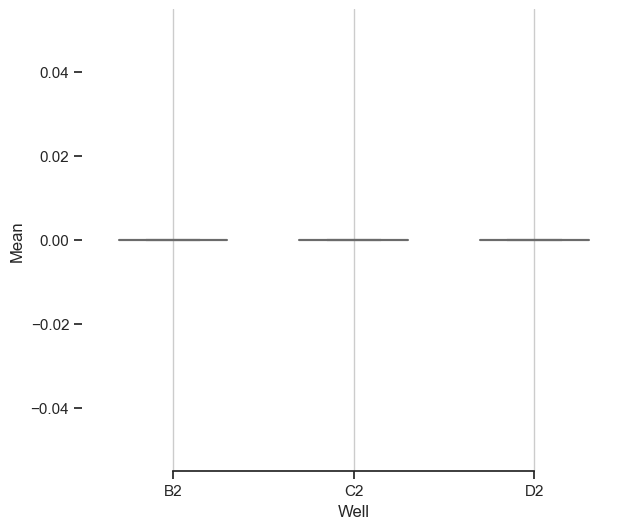

In [22]:
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))

# Plot the orbital period with horizontal boxes
sns.boxplot(
    x="Well",
    y="Mean",
    data=well_set1,
    width=0.6,
    palette="vlag",
    showfliers=False,
)

# Add in points to show each observation
# sns.swarmplot(x="Well", y="Mean", data=B23,
#              size=3, palette="vlag")

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="Mean")
sns.despine(trim=True, left=True)

In [23]:
well_set1, well_set2 = visSets(set1, set2, path)
well_set1["Set"] = 1
well_set1["Well"].describe()

well_set2["Set"] = 2
well_set2["Well"].describe()


print("Mean Brigthnes")
print("Set1")
print(well_set1["Mean"].mean())
print("Set2")
print(well_set2["Mean"].mean())

print("Mean Area")
print("Set1")
print(well_set1["Area"].mean())
print("Set2")
print(well_set2["Area"].mean())

print("--Mean/Area--")
print("Set1")
m2a1 = well_set1["Mean"].mean() / well_set1["Area"].mean()
print(m2a1)
print("Set2")
m2a2 = well_set2["Mean"].mean() / well_set2["Area"].mean()
print(m2a2)

print("Fold: {}".format(m2a2 / m2a1))

Files and directories in ' Results_24h/ ' :
Mean Brigthnes
Set1
0.08119425384615385
Set2
0.07427574277168494
Mean Area
Set1
0.00020442692307692304
Set2
0.00021621136590229312
--Mean/Area--
Set1
397.17984609885053
Set2
343.5330166927972
Fold: 0.8649306354967929


Files and directories in ' Results_24h/ ' :
Statistics:

p = 1.28672e-154
null hypothesis: B2 comes from a normal distribution
The null hypothesis can be rejected

p = 1.78114e-132
null hypothesis: C2 comes from a normal distribution
The null hypothesis can be rejected

p = 2.75966e-138
null hypothesis: D2 comes from a normal distribution
The null hypothesis can be rejected

p = 4.24683e-165
null hypothesis: B3 comes from a normal distribution
The null hypothesis can be rejected

p = 1.21652e-124
null hypothesis: C3 comes from a normal distribution
The null hypothesis can be rejected

p = 6.6215e-42
null hypothesis: D3 comes from a normal distribution
The null hypothesis can be rejected

[1.4436132850820867e-06, 0.23866397225950742, 0.7657582600070457, 0.00046368584144167575, 0.6752605396361612, 0.06361928621875049, 3.140033101577744e-08, 0.04965201835510927, 0.7071774278157301]
D2 vs. B3: Custom statistical test, P_val:3.140e-08
C2 vs. B3: Custom statistical test, P_val:4.637e-04
D2 v

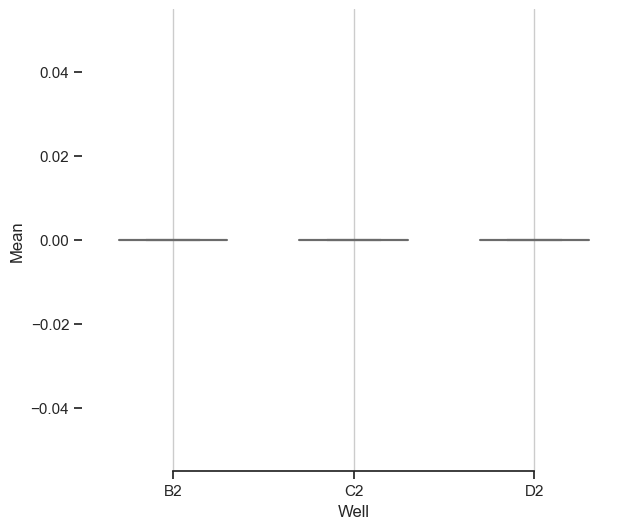

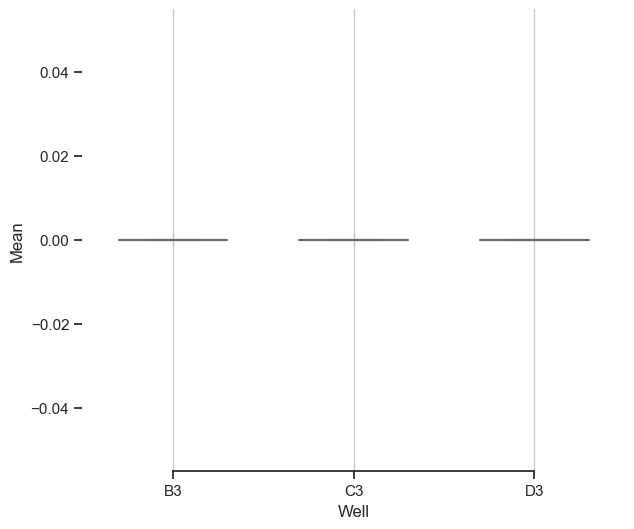

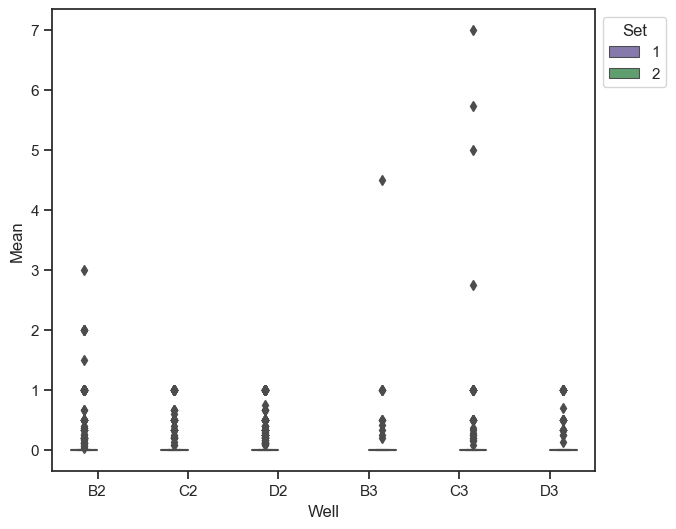

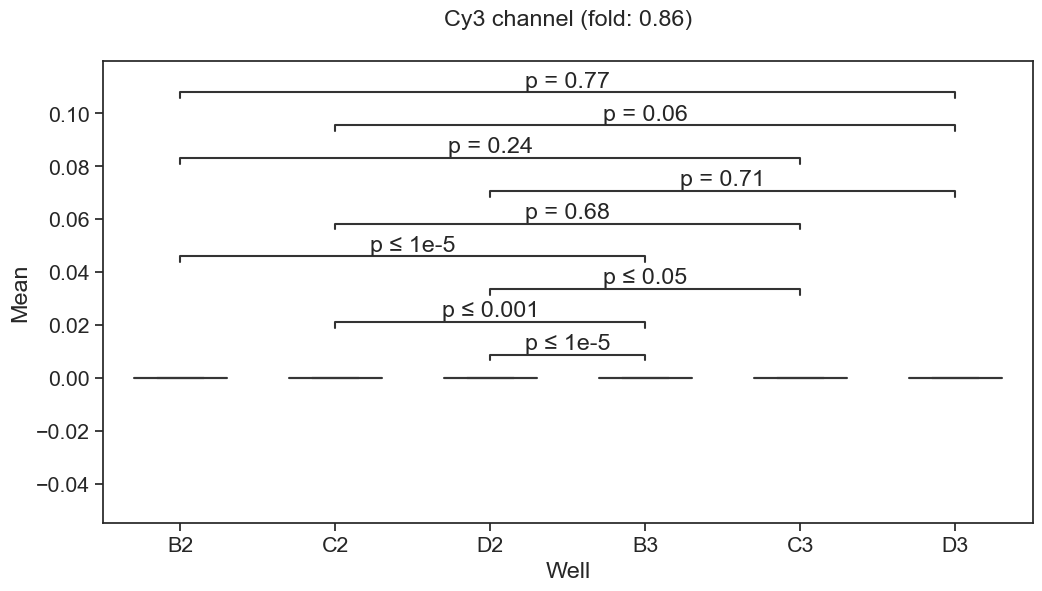

In [24]:
visStats(
    set1,
    set2,
    path,
    "Cy3 channel (fold: {:.2f})".format(m2a2 / m2a1),
    "24H_" + "".join(set1) + "".join(set2),
)

In [25]:
watermark(iversions=True, globals_=globals())
print(watermark())

Last updated: 2023-02-08T07:03:47.385126+01:00

Python implementation: CPython
Python version       : 3.9.16
IPython version      : 8.9.0

Compiler    : MSC v.1929 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 60 Stepping 3, GenuineIntel
CPU cores   : 8
Architecture: 64bit



In [26]:
print(
    watermark(
        packages="watermark,numpy,pandas,seaborn,scipy,statannotations,statsmodels"
    )
)

watermark      : 2.3.1
numpy          : 1.24.1
pandas         : 1.5.3
seaborn        : 0.11.2
scipy          : 1.10.0
statannotations: 0.5.0
statsmodels    : 0.13.5

